题目:

根据学生的两门成绩，预测该学生是否会被大学录取

## 1.导入数据

1.导入需要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.导入数据集

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, names=['score 1', 'score 2', 'Accepted'])
data.head()

,score 1,score 2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


3.数据可视化

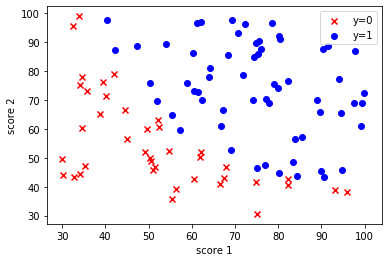

In [6]:
fig,ax = plt.subplots()

# 绘制标签为0的散点图
ax.scatter(data[data['Accepted']==0]['score 1'],data[data['Accepted']==0]['score 2'],c='r',marker='x',label='y=0')
# 绘制标签为1的散点图
ax.scatter(data[data['Accepted']==1]['score 1'],data[data['Accepted']==1]['score 2'],c='b',marker='o',label='y=1')

ax.legend()
ax.set(xlabel='score 1', ylabel='score 2')
plt.show()

## 2.构造数据集

1.封装一个get_Xy()函数来获取输入向量X和输出向量y以及初始化参数向量theta：

In [7]:
def get_Xy_theta(data):
    data.insert(0,'$x_0$',1)  # 插入一个x_0 = 1
    cols = data.shape[1]  # 定义 cols 就是表格的一列

    # X 矩阵代表表格的第0列到（cols-1）列（即：特征）
    X_ = data.iloc[:,0:cols-1]
    X = X_.values

    # y 矩阵代表表格的最后一列（即：标签）
    y_ = data.iloc[:,cols-1:cols]
    y = y_.values   

    # 定义 theta 矩阵是0矩阵（即：theta的初始值是0）
    theta = np.zeros((X.shape[1], y.shape[1]))

    return X,y,theta

X,y,theta = get_Xy_theta(data)

2.用 X.shape 、 y.shape 和theta.shape查看数组的维度 ，维度分别为(100，3)、(100，1)和(3，1)

In [9]:
print(X.shape)
print(y.shape)
print(theta.shape)

(100, 3)
(100, 1)
(3, 1)


## 3.代价函数

1.假设函数：
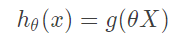

2.逻辑函数：
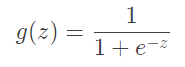

In [10]:
# 逻辑函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

3.代价函数：
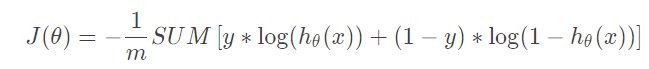

In [11]:
# 代价函数
def costFunction(X,y,theta):
    A = sigmoid(X@theta)  # 假设函数， @是矩阵的乘法
    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    return -np.sum(first + second) / len(X) 

## 4.梯度下降

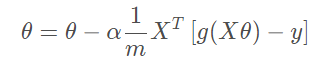

1.定义梯度下降函数：

In [18]:
def gradientDescent(X,y,theta,iters,alpha):  # iters 为迭代次数
    m = len(X)
    costs = []
    
    # 进行iters次迭代
    for i in range(iters):
        A = sigmoid(X@theta)
        theta  = theta -(alpha/m)  * X.T @ (A - y) # 执行梯度下降公式
        cost = costFunction(X,y,theta) # 计算当前theta下的代价函数值
        costs.append(cost)
        
        if i % 10000 == 0:  # 每10000次打印一次cost
            print(cost) 
        
    return costs, theta

2.给学习率alpha 和迭代次数iters赋上初值，就能得到迭代结束后的最终参数theta_final

In [22]:
alpha = 0.004
iters = 280000   # 经过实验iters取280000就可以达到最佳的cost

# 执行上面定义的梯度下降算法，得到theta
costs, theta_final = gradientDescent(X,y,theta,iters,alpha)

1.988653857893008
2.7066763807478127
5.159653459570274
1.3288041261254446
1.652586574603404
1.0308068897458484
0.3472923789851703
0.9096115932296464
0.4430408399842715
0.4565991514853737
0.5866917398249707
0.5569757352913881
0.518959518059351
0.4768662047129453
0.4339273802205826
0.39217124439014617
0.353164689972273
0.3183509790412362
0.28891027509245654
0.2653627656814121
0.24734965008663645
0.23391905949161806
0.22400004604527268
0.21667752659276343
0.21125545491406164
0.20723550227482504
0.2043863886812864
0.20369001890788238


## 5.绘制决策边界

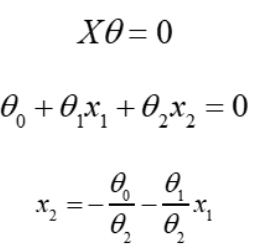

1.要绘制出决策线，先求出直线的两个参数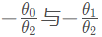

In [23]:
para1 = - theta_final[0,0] / theta_final[2,0]
para2 = - theta_final[1,0] / theta_final[2,0]

2.结果可视化

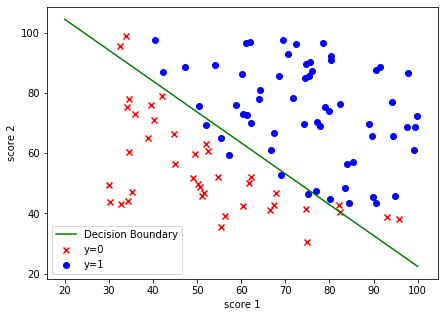

In [26]:
fig,ax = plt.subplots(figsize=(7,5))

#绘制直线
x = np.linspace(20,100,2)  #在20到100之前绘制2个点确定直线，注意纵轴为Exam2，刻度在20-100
y_ = para1 + para2 * x
ax.plot(x,y_,c='g',label='Decision Boundary')

#绘制原始数据
ax.scatter(data[data['Accepted']==0]['score 1'], data[data['Accepted']==0]['score 2'],c='r',marker='x',label='y=0')   
ax.scatter(data[data['Accepted']==1]['score 1'], data[data['Accepted']==1]['score 2'],c='b',marker='o',label='y=1')

ax.legend()   #显示标签label
ax.set(xlabel='score 1', ylabel='score 2')
plt.show()

## 6.计算分类正确率

在逻辑回归中，假设函数表示 “预测值=1” 的概率:
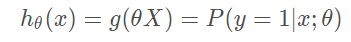

1.定义假设函数，获取假设输出向量：

In [45]:
def predict(X,theta):
    prob = sigmoid(X@theta)  
    return [1 if result >= 0.5 else 0 for result in prob] #返回一个列表

h_x = predict(X,theta_final)        # 在参数为theta_final下的假设输出，为列表类型
h_x = np.array(h_x)                 # 将列表转化为一维数组
h_x = h_x.reshape(len(h_x ),1)      # 转换为列向量

print(h_x.shape)
print(y.shape)

(100, 1)
(100, 1)


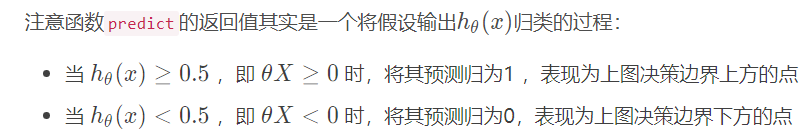

In [46]:
acc = np.mean(h_x == y)    # 将假设输出和真实输出进行比较，求平均值
print(acc)

0.89


可以得到在参数为final_theta条件下，该模型的正确率为 0.89，由于总样本数为100个，因此有11个样本点分类错误